In [9]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

In [10]:
x = torch.tensor(1., requires_grad=True)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

# Build a computational graph.
y = w * x + b    # y = 2 * x + 3

# Compute gradients.
y.backward(retain_graph=True)

# Print out the gradients.
print(x.grad)    # x.grad = 2
print(w.grad)    # w.grad = 1
print(b.grad)    # b.grad = 1

# Compute gradients.

y.backward(retain_graph=True)

# Print out the gradients.
print(x.grad)    # x.grad = 2
print(w.grad)    # w.grad = 1
print(b.grad)    # b.grad = 1

y.backward(retain_graph=True)

# Print out the gradients.
print(x.grad)    # x.grad = 2
print(w.grad)    # w.grad = 1
print(b.grad)    # b.grad = 1


tensor(2.)
tensor(1.)
tensor(1.)
tensor(4.)
tensor(2.)
tensor(2.)
tensor(6.)
tensor(3.)
tensor(3.)


In [11]:
x = torch.randn(10, 3)
y = torch.randn(10, 2)

# Build a fully connected layer.
linear = nn.Linear(3, 2)
print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# Forward pass.
pred = linear(x)

# Compute loss.
loss = criterion(pred, y) +  3*criterion(2*pred, y)
print('loss: ', loss.item())

w:  Parameter containing:
tensor([[-0.3083, -0.3908, -0.0916],
        [-0.2473,  0.4523,  0.2336]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.0698, -0.4536], requires_grad=True)
loss:  11.13102912902832


In [12]:
# Backward pass.
loss.backward(retain_graph=True)

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad)
print ('dL/db: ', linear.bias.grad)

optimizer.zero_grad()

loss.backward(retain_graph=True)

# Print out the gradients.
print ('dL/dw: ', linear.weight.grad)
print ('dL/db: ', linear.bias.grad)

# 1-step gradient descent.
optimizer.step()

# You can also perform gradient descent at the low level.
# linear.weight.data.sub_(0.01 * linear.weight.grad.data)
# linear.bias.data.sub_(0.01 * linear.bias.grad.data)

# Print out the loss after 1-step gradient descent.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.item())

dL/dw:  tensor([[-10.2175,  -2.5126,  -7.2176],
        [ -3.4455,   3.9356,   6.1196]])
dL/db:  tensor([-1.8300, -8.6937])
dL/dw:  tensor([[-10.2175,  -2.5126,  -7.2176],
        [ -3.4455,   3.9356,   6.1196]])
dL/db:  tensor([-1.8300, -8.6937])
loss after 1 step optimization:  1.3294565677642822


In [13]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms


# Hyper-parameters
input_size = 28 * 28    # 784
num_classes = 10
num_epochs = 5
batch_size = 2
learning_rate = 0.001

# MNIST dataset (images and labels)
train_dataset = torchvision.datasets.MNIST(root='../../data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader (input pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Logistic regression model
model = nn.Linear(input_size, num_classes)

# Loss and optimizer
# nn.CrossEntropyLoss() computes softmax internally
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [14]:
for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        if(i <= 1):
          print(images)
          images = images.reshape(-1, 28*28)
          labels = labels
          print(images)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0., 

In [15]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
a.reshape(-1,2)
a.reshape(-1)

array([1, 2, 3, 4, 5, 6, 7, 8])

In [16]:
#https://medium.com/@mustafa.kamalzhd/writing-a-custom-loss-in-pytorch-part-1-7dd857934f48
import torch
import torch.nn as nn

class CustomMSELoss(nn.Module):
    def __init__(self):
        super(CustomMSELoss, self).__init__()

    def forward(self, predictions, targets):
        return torch.mean((predictions - targets) ** 2)

loss_fn = CustomMSELoss()
# loss = loss_fn(predictions, targets)

In [17]:
#https://jamesmccaffrey.wordpress.com/2022/11/28/custom-loss-functions-for-pytorch/

def my_L1Loss(output, target):
  loss = torch.mean(torch.abs(output - target))
  return loss

output = torch.tensor([2,1], dtype=torch.float32)
loss_val = my_L1Loss(output, y)

def weighted_L1Loss(output, target, device):
  # weight poverty twice as much as price
  wts = torch.tensor([2,1], dtype=torch.float32).to(device) # by cols
  weighted_outputs = torch.mul(output, wts)
  weighted_targets = torch.mul(target, wts)
  loss = torch.mean(torch.abs(weighted_outputs - weighted_targets))
  return loss


loss_val = weighted_L1Loss(output, y, "cpu")

NameError: name 'output' is not defined

In [18]:
##### CREATE A DATASET AND DATALOADER FROM arrays
#https://stackoverflow.com/questions/44429199/how-to-load-a-list-of-numpy-arrays-to-pytorch-dataset-loader


import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader


my_x = []
my_y = []

batch_size = 12

for i in range(24):
  my_x.append(np.random.randint(1,101,5))
  my_y.append(np.random.randint(1,3,1))


tensor_x = torch.Tensor(my_x) # transform to torch tensor
tensor_y = torch.Tensor(my_y)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset,batch_size) # create your dataloader

for input,label in my_dataloader:
  print("###########")
  print(input)
  print(label)

###########
tensor([[78., 14., 87., 43., 48.],
        [37.,  8., 28., 52., 83.],
        [26., 48., 35., 40., 69.],
        [87., 97., 80.,  7., 20.],
        [16.,  7., 74., 42.,  9.],
        [97.,  7., 73., 56., 82.],
        [ 7., 91., 85., 74., 27.],
        [59., 79., 58.,  9., 47.],
        [12., 96., 75., 33., 73.],
        [68., 81., 48., 42., 66.],
        [75., 39., 94., 60., 36.],
        [12., 36., 86., 96., 51.]])
tensor([[1.],
        [2.],
        [2.],
        [1.],
        [1.],
        [2.],
        [1.],
        [2.],
        [2.],
        [2.],
        [1.],
        [1.]])
###########
tensor([[ 72.,   4.,  22.,  32.,  23.],
        [ 72.,  21.,  89.,  25.,  31.],
        [ 64.,  29.,  78.,  91.,  53.],
        [ 13.,  18.,  37.,  70.,   1.],
        [ 96.,  74.,  33.,  38.,  66.],
        [ 90.,  25.,  37.,  17.,  50.],
        [ 67.,  52.,  87.,  23.,  52.],
        [ 88.,  86.,  24.,  41.,  55.],
        [ 78.,  44.,  30.,  10.,  32.],
        [ 69.,   9.,  19.,

C:\Users\nntoa\AppData\Local\Temp\ipykernel_2572\1373304879.py:20: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  tensor_x = torch.Tensor(my_x) # transform to torch tensor


In [19]:
### Create sub-dataloader from a given dataloader
## We may need it for our DP research

for i,(input,label) in enumerate(my_dataloader):
  print("###########")
  print(i)
  print(input)
  print(label)

  mini_batch_size = 3
  mini_dataset = TensorDataset(input,label)
  mini_dataloader = DataLoader(mini_dataset,mini_batch_size)

  for j,(inputx,labelx) in enumerate(mini_dataloader):
    print("*******")
    print(j)
    print(inputx)
    print(labelx)


###########
0
tensor([[78., 14., 87., 43., 48.],
        [37.,  8., 28., 52., 83.],
        [26., 48., 35., 40., 69.],
        [87., 97., 80.,  7., 20.],
        [16.,  7., 74., 42.,  9.],
        [97.,  7., 73., 56., 82.],
        [ 7., 91., 85., 74., 27.],
        [59., 79., 58.,  9., 47.],
        [12., 96., 75., 33., 73.],
        [68., 81., 48., 42., 66.],
        [75., 39., 94., 60., 36.],
        [12., 36., 86., 96., 51.]])
tensor([[1.],
        [2.],
        [2.],
        [1.],
        [1.],
        [2.],
        [1.],
        [2.],
        [2.],
        [2.],
        [1.],
        [1.]])
*******
0
tensor([[78., 14., 87., 43., 48.],
        [37.,  8., 28., 52., 83.],
        [26., 48., 35., 40., 69.]])
tensor([[1.],
        [2.],
        [2.]])
*******
1
tensor([[87., 97., 80.,  7., 20.],
        [16.,  7., 74., 42.,  9.],
        [97.,  7., 73., 56., 82.]])
tensor([[1.],
        [1.],
        [2.]])
*******
2
tensor([[ 7., 91., 85., 74., 27.],
        [59., 79., 58.,  9., 47.]

In [20]:
#https://stackoverflow.com/questions/73629330/what-exactly-is-meant-by-param-groups-in-pytorch

#we show changning in our defined param_groups also leads to the change in model.param_groups

import torch
import torch.nn as nn
import torch.optim as optim


class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 2)
        self.layer2 = nn.Linear(2, 1)

    def forward(self, x):
        return self.layer2(self.layer1(x))


model = LinearModel()
# optimizer requires default learning rate even if its overridden by all param groups
optimizer = optim.SGD(model.parameters(), lr=10)

for param in optimizer.param_groups:
  print(f"param: {param}")

print(f"lr: {optimizer.param_groups[0]}")



# for i in range(2):
#     output = model(torch.zeros(1, 3))
#     loss = output.sum()
#     optimizer.zero_grad()
#     loss.backward()

#     # we can change the learning rate whenever we want for each param group
#     print(f'step {i} learning rates')
#     for name, param_group in zip(param_group_names, optimizer.param_groups):
#         param_group['lr'] = learning_rates[name] / (i + 1)
#         print(f'    {name}: {param_group["lr"]}')
#         print(f'    {name}: {param_group["params"]}')

#     print("xxxxxxxx")
#     for name, parameter in model.named_parameters():
#         print(name)
#         print(parameter)

#     print("yyyyyyy")

#     optimizer.step()

param: {'params': [Parameter containing:
tensor([[ 0.4352,  0.5631, -0.2654],
        [-0.0384, -0.0940, -0.4564]], requires_grad=True), Parameter containing:
tensor([-0.2266, -0.5307], requires_grad=True), Parameter containing:
tensor([[ 0.6050, -0.3218]], requires_grad=True), Parameter containing:
tensor([0.5907], requires_grad=True)], 'lr': 10, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None}
lr: {'params': [Parameter containing:
tensor([[ 0.4352,  0.5631, -0.2654],
        [-0.0384, -0.0940, -0.4564]], requires_grad=True), Parameter containing:
tensor([-0.2266, -0.5307], requires_grad=True), Parameter containing:
tensor([[ 0.6050, -0.3218]], requires_grad=True), Parameter containing:
tensor([0.5907], requires_grad=True)], 'lr': 10, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None}


In [21]:
#https://stackoverflow.com/questions/73629330/what-exactly-is-meant-by-param-groups-in-pytorch

#we show changning in our defined param_groups also leads to the change in model.param_groups

import torch
import torch.nn as nn
import torch.optim as optim


class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 2)
        self.layer2 = nn.Linear(2, 1)

    def forward(self, x):
        return self.layer2(self.layer1(x))


model = LinearModel()

learning_rates = {
    'layer1.weight': 0.01,
    'layer1.bias': 0.1,
    'layer2.weight': 0.001,
    'layer2.bias': 1.0}

# Build param_group where each group consists of a single parameter.
# `param_group_names` is created so we can keep track of which param_group
# corresponds to which parameter.
param_groups = []
param_group_names = []
for name, parameter in model.named_parameters():
    param_groups.append({'params': [parameter], 'lr': learning_rates[name]})
    param_group_names.append(name)

# optimizer requires default learning rate even if its overridden by all param groups
optimizer = optim.SGD(param_groups, lr=10)

for i in range(2):
    output = model(torch.zeros(1, 3))
    loss = output.sum()
    optimizer.zero_grad()
    loss.backward()

    # we can change the learning rate whenever we want for each param group
    print(f'step {i} learning rates')
    for name, param_group in zip(param_group_names, optimizer.param_groups):
        param_group['lr'] = learning_rates[name] / (i + 1)
        print(f'    {name}: {param_group["lr"]}')
        print(f'    {name}: {param_group["params"]}')

    print("xxxxxxxx")
    for name, parameter in model.named_parameters():
        print(name)
        print(parameter)

    print("yyyyyyy")

    optimizer.step()

step 0 learning rates
    layer1.weight: 0.01
    layer1.weight: [Parameter containing:
tensor([[ 0.5279,  0.0503, -0.2136],
        [ 0.3738,  0.4496, -0.4380]], requires_grad=True)]
    layer1.bias: 0.1
    layer1.bias: [Parameter containing:
tensor([-0.0525, -0.0419], requires_grad=True)]
    layer2.weight: 0.001
    layer2.weight: [Parameter containing:
tensor([[-0.2364,  0.2687]], requires_grad=True)]
    layer2.bias: 1.0
    layer2.bias: [Parameter containing:
tensor([0.3600], requires_grad=True)]
xxxxxxxx
layer1.weight
Parameter containing:
tensor([[ 0.5279,  0.0503, -0.2136],
        [ 0.3738,  0.4496, -0.4380]], requires_grad=True)
layer1.bias
Parameter containing:
tensor([-0.0525, -0.0419], requires_grad=True)
layer2.weight
Parameter containing:
tensor([[-0.2364,  0.2687]], requires_grad=True)
layer2.bias
Parameter containing:
tensor([0.3600], requires_grad=True)
yyyyyyy
step 1 learning rates
    layer1.weight: 0.005
    layer1.weight: [Parameter containing:
tensor([[ 0.5279,

In [22]:
#https://stackoverflow.com/questions/73629330/what-exactly-is-meant-by-param-groups-in-pytorch

#we show changning in our defined param_groups also leads to the change in model.param_groups
#we show changing in our defined param_groups and model.param_groups can be done by param.data
#https://discuss.pytorch.org/t/manually-change-assign-weights-of-a-neural-network/115444
    # def set_to_one(self, model):
    #     for name, param in model.named_parameters():
    #         values = torch.ones(param.shape)
    #         param.data = values

import torch
import torch.nn as nn
import torch.optim as optim


class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 2)
        self.layer2 = nn.Linear(2, 1)

    def forward(self, x):
        return self.layer2(self.layer1(x))


model = LinearModel()

learning_rates = {
    'layer1.weight': 0.01,
    'layer1.bias': 0.1,
    'layer2.weight': 0.001,
    'layer2.bias': 1.0}

# Build param_group where each group consists of a single parameter.
# `param_group_names` is created so we can keep track of which param_group
# corresponds to which parameter.
param_groups = []
param_group_names = []
for name, parameter in model.named_parameters():
    param_groups.append({'params': [parameter], 'lr': learning_rates[name]})
    param_group_names.append(name)

# optimizer requires default learning rate even if its overridden by all param groups
optimizer = optim.SGD(param_groups, lr=10)

for i in range(2):
    output = model(torch.zeros(1, 3))
    loss = output.sum()
    optimizer.zero_grad()
    loss.backward()

    # we can change the learning rate whenever we want for each param group
    print(f'step {i} learning rates')
    for name, param_group in zip(param_group_names, optimizer.param_groups):
        param_group['lr'] = learning_rates[name] / (i + 1)
        print(f'    {name}: {param_group["lr"]}')
        print(f'    {name}: {param_group["params"]}')

    print("xxxxxxxx")
    for name, parameter in model.named_parameters():
        print(name)
        print(parameter)

    print("yyyyyyy")
    print("manipulate the parameters using parameter.data")
    for name, parameter in model.named_parameters():
        print(name)
        print("before: ",parameter)
        parameter.data = parameter.data * 2
        print("after: ",parameter)

    print("zzzz")

    optimizer.step()

step 0 learning rates
    layer1.weight: 0.01
    layer1.weight: [Parameter containing:
tensor([[ 0.0801,  0.4628,  0.1492],
        [ 0.4205, -0.1821,  0.4633]], requires_grad=True)]
    layer1.bias: 0.1
    layer1.bias: [Parameter containing:
tensor([ 0.5570, -0.3291], requires_grad=True)]
    layer2.weight: 0.001
    layer2.weight: [Parameter containing:
tensor([[-0.5903, -0.2192]], requires_grad=True)]
    layer2.bias: 1.0
    layer2.bias: [Parameter containing:
tensor([0.0053], requires_grad=True)]
xxxxxxxx
layer1.weight
Parameter containing:
tensor([[ 0.0801,  0.4628,  0.1492],
        [ 0.4205, -0.1821,  0.4633]], requires_grad=True)
layer1.bias
Parameter containing:
tensor([ 0.5570, -0.3291], requires_grad=True)
layer2.weight
Parameter containing:
tensor([[-0.5903, -0.2192]], requires_grad=True)
layer2.bias
Parameter containing:
tensor([0.0053], requires_grad=True)
yyyyyyy
manipulate the parameters using parameter.data
layer1.weight
before:  Parameter containing:
tensor([[ 0.08

In [23]:
#https://stackoverflow.com/questions/73629330/what-exactly-is-meant-by-param-groups-in-pytorch

#we show changning in our defined param_groups also leads to the change in model.param_groups
#we show changing in our defined param_groups and model.param_groups can be done by param.data
#https://discuss.pytorch.org/t/manually-change-assign-weights-of-a-neural-network/115444
    # def set_to_one(self, model):
    #     for name, param in model.named_parameters():
    #         values = torch.ones(param.shape)
    #         param.data = values

#https://www.programcreek.com/python/example/113970/torch.nn.utils.clip_grad_norm_

import torch
import torch.nn as nn
import torch.optim as optim


class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 2)
        self.layer2 = nn.Linear(2, 1)

    def forward(self, x):
        return self.layer2(self.layer1(x))


model = LinearModel()
optimizer = optim.SGD(model.parameters(), lr=10)
output = model(torch.zeros(1, 3))
loss = output.sum()
optimizer.zero_grad()
loss.backward()

# for name, parameter in model.named_parameters():
#     print(name)
#     print("before: ",parameter)
#     parameter.data = parameter.data * 2
#     print("after: ",parameter)
#     print("xxxxxx")
#     print("grad")
#     print("grad before: ", parameter.grad)
#     parameter.grad = parameter.grad*2
#     print("grad after: ", parameter.grad)
#     print("zzzzzz")

# params = []
# for param in model.parameters():
#     params.append(param.view(-1)) #merge the weights and bias
#     print(param)
#     print("dddddd")
#     print(param.view(-1))

for param in model.parameters():
    print("vvvvvvv")
    print("param.data: ", param.data)
    print("param.grad: ", param.grad)
    param.data = param.data + param.grad
    print("data + grad: ", param.data)
    norml2 = torch.norm(param.grad)
    print("norm of grad: ", norml2)

    torch.nn.utils.clip_grad_norm(param, max_norm=0.001*norml2, norm_type=2.0)
    print("clipped param.grad: ", param.grad)
    print("eeeee")



vvvvvvv
param.data:  tensor([[-0.4033,  0.4925, -0.0318],
        [ 0.0829, -0.1622,  0.4725]])
param.grad:  tensor([[0., 0., 0.],
        [0., 0., 0.]])
data + grad:  tensor([[-0.4033,  0.4925, -0.0318],
        [ 0.0829, -0.1622,  0.4725]])
norm of grad:  tensor(0.)
clipped param.grad:  tensor([[0., 0., 0.],
        [0., 0., 0.]])
eeeee
vvvvvvv
param.data:  tensor([0.5173, 0.5733])
param.grad:  tensor([0.0949, 0.4139])
data + grad:  tensor([0.6122, 0.9872])
norm of grad:  tensor(0.4247)
clipped param.grad:  tensor([9.4911e-05, 4.1391e-04])
eeeee
vvvvvvv
param.data:  tensor([[0.0949, 0.4139]])
param.grad:  tensor([[0.5173, 0.5733]])
data + grad:  tensor([[0.6122, 0.9872]])
norm of grad:  tensor(0.7721)
clipped param.grad:  tensor([[0.0005, 0.0006]])
eeeee
vvvvvvv
param.data:  tensor([0.5941])
param.grad:  tensor([1.])
data + grad:  tensor([1.5941])
norm of grad:  tensor(1.)
clipped param.grad:  tensor([0.0010])
eeeee


C:\Users\nntoa\AppData\Local\Temp\ipykernel_2572\2338325451.py:63: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(param, max_norm=0.001*norml2, norm_type=2.0)


In [24]:
#https://stackoverflow.com/questions/73629330/what-exactly-is-meant-by-param-groups-in-pytorch

#we show changning in our defined param_groups also leads to the change in model.param_groups
#we show changing in our defined param_groups and model.param_groups can be done by param.data
#https://discuss.pytorch.org/t/manually-change-assign-weights-of-a-neural-network/115444
    # def set_to_one(self, model):
    #     for name, param in model.named_parameters():
    #         values = torch.ones(param.shape)
    #         param.data = values

#https://www.programcreek.com/python/example/113970/torch.nn.utils.clip_grad_norm_

import torch
import torch.nn as nn
import torch.optim as optim


class LinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(3, 1)
        #self.layer2 = nn.Linear(2, 1)

    def forward(self, x):
        return self.layer1(x)
        #return self.layer2(self.layer1(x))


model = LinearModel()
optimizer = optim.SGD(model.parameters(), lr=10)
#output = model(torch.zeros(1, 3))
#print(torch.zeros(1, 3))
output = model(torch.tensor([[1., 2., 3.]]))
loss = output.sum()
optimizer.zero_grad()
loss.backward()


# for param in model.parameters():
#     print("vvvvvvv")
#     print("param.data: ", param.data)
#     print("param.grad: ", param.grad)
#     param.data = param.data + param.grad
#     print("data + grad: ", param.data)
#     norml2 = torch.norm(param.grad)
#     print("norm of grad: ", norml2)

#     torch.nn.utils.clip_grad_norm(param, max_norm= 0.1*norml2, norm_type=2.0)
#     print("clipped param.grad: ", param.grad)
#     print("clipped grad shape: ", param.grad.size())
#     param.grad = param.grad + (0.1**0.5)*torch.randn(param.grad.size())
#     print("noisy grad: ", param.grad)

#     print("eeeee")

# params = []
# for param in model.parameters():
#     params.append(param.view(-1)) #merge the weights and bias
#     print(param)
#     print("dddddd")
#     print(param.view(-1))

#compute the norm of all grad vectors:
normTotal = 0
for param in model.parameters():
    norml2 = torch.norm(param.grad)
    normTotal = normTotal + norml2**2
    print("norml2: ", norml2)
    print("normTotal: ", normTotal)


norml2:  tensor(3.7417)
normTotal:  tensor(14.0000)
norml2:  tensor(1.)
normTotal:  tensor(15.0000)


In [25]:
# scheduler https://machinelearningmastery.com/using-learning-rate-schedule-in-pytorch-training/
# https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate

#example 1
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# load dataset, split into input (X) and output (y) variables
dataframe = pd.read_csv("ionosphere.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:34].astype(float)
y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# create model
model = nn.Sequential(
    nn.Linear(34, 34),
    nn.ReLU(),
    nn.Linear(34, 1),
    nn.Sigmoid()
)

# Train the model
n_epochs = 50
batch_size = 24
batch_start = torch.arange(0, len(X_train), batch_size)
lr = 0.1
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
scheduler = lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.5, total_iters=30)
model.train()
for epoch in range(n_epochs):
    for start in batch_start:
        X_batch = X_train[start:start+batch_size]
        y_batch = y_train[start:start+batch_size]
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    before_lr = optimizer.param_groups[0]["lr"]
    scheduler.step()
    after_lr = optimizer.param_groups[0]["lr"]
    print("Epoch %d: SGD lr %.4f -> %.4f" % (epoch, before_lr, after_lr))

# evaluate accuracy after training
model.eval()
y_pred = model(X_test)
acc = (y_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))


#example 2

def lr_lambda(epoch):
    # LR to be 0.1 * (1/1+0.01*epoch)
    base_lr = 0.1
    factor = 0.01
    return base_lr/(1+factor*epoch)

scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda)

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# load dataset, split into input (X) and output (y) variables
dataframe = pd.read_csv("ionosphere.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:34].astype(float)
y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)

# convert into PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# train-test split for evaluation of the model
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# create model
model = nn.Sequential(
    nn.Linear(34, 34),
    nn.ReLU(),
    nn.Linear(34, 1),
    nn.Sigmoid()
)

def lr_lambda(epoch):
    # LR to be 0.1 * (1/1+0.01*epoch)
    base_lr = 0.1
    factor = 0.01
    return base_lr/(1+factor*epoch)

# Train the model
n_epochs = 50
batch_size = 24
batch_start = torch.arange(0, len(X_train), batch_size)
lr = 0.1
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)
scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda)
model.train()
for epoch in range(n_epochs):
    for start in batch_start:
        X_batch = X_train[start:start+batch_size]
        y_batch = y_train[start:start+batch_size]
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    before_lr = optimizer.param_groups[0]["lr"]
    scheduler.step()
    after_lr = optimizer.param_groups[0]["lr"]
    print("Epoch %d: SGD lr %.4f -> %.4f" % (epoch, before_lr, after_lr))

# evaluate accuracy after training
model.eval()
y_pred = model(X_test)
acc = (y_pred.round() == y_test).float().mean()
acc = float(acc)
print("Model accuracy: %.2f%%" % (acc*100))





FileNotFoundError: [Errno 2] No such file or directory: 'ionosphere.csv'

In [ ]:
#https://pytorch.org/tutorials/intermediate/per_sample_grads.html?utm_source=whats_new_tutorials&utm_medium=per_sample_grads



In [ ]:
#https://stackoverflow.com/questions/59090533/how-do-i-add-some-gaussian-noise-to-a-tensor-in-pytorch


import torch

x = torch.tensor([[[1, 2, 3], [4, 5, 6]],[[1, 2, 3], [4, 5, 6]]])
print(x.size())

x = x + (0.1**0.5)*torch.randn(x.size())

print(x)

# x = torch.zeros(5, 10, 20, dtype=torch.float64)
# print(x)
# x = x + (0.1**0.5)*torch.randn(5, 10, 20)
# print(x)

torch.Size([2, 2, 3])
tensor([[[0.9755, 2.1539, 3.0024],
         [4.2981, 4.7473, 6.6748]],

        [[1.2218, 1.9470, 2.9126],
         [4.1704, 5.3141, 5.8889]]])


In [ ]:
#multiple inputs
#https://saturncloud.io/blog/how-to-construct-a-network-with-two-inputs-in-pytorch/

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

import torch.optim as optim

net = Net()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

for epoch in range(100):
    running_loss = 0.0
    for i in range(n):
        inputs, labels = get_next_batch() # Get the next batch of data
        optimizer.zero_grad() # Zero the gradients
        outputs = net(inputs[:,0], inputs[:,1]) # Forward pass
        loss = criterion(outputs, labels) # Compute the loss
        loss.backward() # Backward pass
        optimizer.step() # Update the weights
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / n))


In [ ]:
print(torchvision.datasets)

<module 'torchvision.datasets' from '/usr/local/lib/python3.10/dist-packages/torchvision/datasets/__init__.py'>


In [ ]:
#https://viblo.asia/p/pytorch-fundamentals-YWOZrAmrKQ0
#https://phamdinhkhanh.github.io/2019/08/10/PytorchTurtorial1.html

x = torch.randn(10,10)
print(x.shape)
# torch.size(10,10)
z1 = x.unsqueeze(0)
print(z1.shape)
# torch.size(1,10,10)
# The same can be achieved using [None] indexing
# Adding None will auto create a fake dim
# at the specified axis
x = torch.randn(10,10)
z2, z3, z4 = x[None], x[:,None], x[:,:,None]
print(z2.shape, z3.shape, z4.shape)
# torch.Size([1, 10, 10])
# torch.Size([10, 1, 10])
# torch.Size([10, 10, 1])

In [ ]:
x = torch.randn(2,10)
print(x)
x = x.view(-1)
print(x)

print(x.shape)

In [ ]:
#https://github.com/nttuan8/Pytorch_tutorial/blob/main/L3/CNN_MNIST.ipynb

import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # input 1 channel, output 6 channel, kernel size 3*3
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)

        self.fc1 = nn.Linear(14*14*32, 128)  # 14*14 from image dimension
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # Flatten to vector to input the neural network
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=6272, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
params = list(net.parameters())

#input = torch.randn(2, 1, 28, 28)
input = torch.randn(1, 28, 28)
#input = input[None,:]
out_call = net(input)
out_forward = net.forward(input)

out_call == out_forward

RuntimeError: ignored

In [ ]:
net = Net()
def print_info(self, input, output):
    # input is a tuple of packed inputs
    # output is a Tensor. output.data is the Tensor we are interested
    print('Inside ' + self.__class__.__name__ + ' forward')

    print('')
    print('input: ', type(input), ', len: ', len(input))
    print('input[0]: ', type(input[0]), ', shape: ', input[0].shape)
    print('output: ', type(output), ', len: ', len(output), output.data.shape)


net.conv2.register_forward_hook(print_info)

out = net(input)

Inside Conv2d forward

input:  <class 'tuple'> , len:  1
input[0]:  <class 'torch.Tensor'> , shape:  torch.Size([2, 32, 28, 28])
output:  <class 'torch.Tensor'> , len:  2 torch.Size([2, 32, 28, 28])


In [ ]:
#target = torch.tensor([[2],[3]])
target = torch.tensor([2,3])
loss_fn = nn.CrossEntropyLoss()

net = Net()
def print_backward_info(self, grad_input, grad_output):
    print('Inside ' + self.__class__.__name__ + ' backward')
    print('grad_input: ', type(grad_input), ', len: ', len(grad_input))
    print('grad_output: ', type(grad_output), ', len: ', len(grad_output))
    print('grad_output[0]: ', type(grad_output[0]), ', size: ', grad_output[0].shape)
    #print('grad_output[0] value: ', grad_output[0])


net.conv1.register_backward_hook(print_backward_info)

out = net(input)
err = loss_fn(out, target)
err.backward()

Inside Conv2d backward
grad_input:  <class 'tuple'> , len:  3
grad_output:  <class 'tuple'> , len:  1
grad_output[0]:  <class 'torch.Tensor'> , size:  torch.Size([2, 32, 28, 28])


In [ ]:
#https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial1/Lisa_Cluster.html [LISA project]
# https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0


#GOOD TUTORIAL ABOUT THE SEREVER FOR MACHINE LEARNING
https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial1/Lisa_Cluster.html
https://winscp.net/eng/index.php
https://filezilla-project.org/

https://slurm.schedmd.com/

https://kb.ndsu.edu/page.php?id=107849





In [ ]:
#https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html.  [Training with validation setup]

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net1(nn.Module):

    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(10, 5)  # 14*14 from image dimension
        self.fc2 = nn.Linear(5, 1)  # 14*14 from image dimension

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)

        return x

net = Net1()
# print(net)
# print(net.parameters)
# for param in net.parameters():
#   print(param)

state1 = net.state_dict()

# print(state1)

# print(state1.keys)

for statekey in state1.keys():
  print(f"state1-key: {statekey}, value: {state1[statekey]}")

#state2 = state1*2

# print(state1)
# print(state2)

from collections import OrderedDict
state2 = OrderedDict()

for statekey in state1.keys():
  # print(statekey)
  # print(state1[statekey])
  # print("$$$$$$$$$$$$$$$")
  state2[statekey] = state1[statekey] * 3

print("state2")
for statekey in state2.keys():
  print(statekey)
  print(state2[statekey])


print("state2")
for statekey in state2.keys():
  print(statekey)
  print(state2[statekey])

state3 = OrderedDict()
for statekey in state1.keys():
  state3[statekey] = state2[statekey] - state1[statekey]

print("state3")
for statekey in state3.keys():
  print(statekey)
  print(state3[statekey])

net.load_state_dict(state3)
print("load new state")
for param in net.parameters():
  print(param)

state1-key: fc1.weight, value: tensor([[ 0.2942,  0.1368,  0.1802,  0.2937, -0.3037,  0.2959,  0.2691, -0.1562,
          0.1362,  0.2291],
        [-0.3132,  0.0211,  0.2937, -0.1027, -0.2754,  0.1530, -0.2383,  0.2560,
         -0.2284,  0.1777],
        [ 0.1441,  0.0385,  0.1329, -0.2058,  0.0093,  0.1870,  0.2973,  0.2103,
         -0.1391, -0.2611],
        [ 0.0026,  0.1237, -0.0555,  0.2653,  0.0924,  0.0348,  0.1522, -0.1670,
         -0.2538,  0.0745],
        [ 0.2783,  0.2584, -0.1085, -0.0836,  0.2771,  0.1885,  0.2261, -0.0456,
          0.3038, -0.2364]])
state1-key: fc1.bias, value: tensor([-0.0671,  0.1637, -0.1931,  0.2826, -0.2874])
state1-key: fc2.weight, value: tensor([[-0.1178,  0.2662,  0.2803,  0.1707,  0.0194]])
state1-key: fc2.bias, value: tensor([0.2299])
state2
fc1.weight
tensor([[ 0.8825,  0.4105,  0.5405,  0.8810, -0.9110,  0.8877,  0.8073, -0.4685,
          0.4087,  0.6872],
        [-0.9397,  0.0632,  0.8812, -0.3082, -0.8263,  0.4590, -0.7150,  0.7679,

In [ ]:
# high CIFAR10 test accuracy

#https://github.com/HaNguyenPhuong/CIFAR10-image-classification/blob/main/CIFAR10_image_classification.ipynb
#https://medium.com/mlearning-ai/cifar10-image-classification-in-pytorch-e5185176fbef#id_token=eyJhbGciOiJSUzI1NiIsImtpZCI6IjZmNzI1NDEwMWY1NmU0MWNmMzVjOTkyNmRlODRhMmQ1NTJiNGM2ZjEiLCJ0eXAiOiJKV1QifQ.eyJpc3MiOiJodHRwczovL2FjY291bnRzLmdvb2dsZS5jb20iLCJhenAiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJhdWQiOiIyMTYyOTYwMzU4MzQtazFrNnFlMDYwczJ0cDJhMmphbTRsamRjbXMwMHN0dGcuYXBwcy5nb29nbGV1c2VyY29udGVudC5jb20iLCJzdWIiOiIxMTgyNDg3NTYyNTY0NjM0NzQ0NTQiLCJlbWFpbCI6ImtoYW5obGluaHRyYW4yNDEyODdAZ21haWwuY29tIiwiZW1haWxfdmVyaWZpZWQiOnRydWUsIm5iZiI6MTY5NTg1MzYxNywibmFtZSI6IktoYW5oIExpbmggVHJhbiIsInBpY3R1cmUiOiJodHRwczovL2xoMy5nb29nbGV1c2VyY29udGVudC5jb20vYS9BQ2c4b2NLR1JtZlZDRWQ4clRLa0wxWVNQd1hIQ2FKWE5MT3p5VlZLNHVKWnNsQ3FHQT1zOTYtYyIsImdpdmVuX25hbWUiOiJLaGFuaCBMaW5oIiwiZmFtaWx5X25hbWUiOiJUcmFuIiwibG9jYWxlIjoiZW4iLCJpYXQiOjE2OTU4NTM5MTcsImV4cCI6MTY5NTg1NzUxNywianRpIjoiZTAxMzQ3ZDg1NDUyMjgyNzA2MzJlZTA2NGI2MDExNDJlNmI4YTE4MiJ9.JAlT5PtJJ4GyCPHfs2pXe1NNpDfnDVjId3yhJ91bKp2-7DudyX2HwG1T6Nn6mDKiGz6cfqq8XIsXh-v9YnjCGEzD3bsSN1UXWlkuN4vP6MgAEnZiKPz_11RYO-u99-u8WMqU2F0NUY0Q_lpc-dX4k6Llpdk69BSr_-EybDY9Fcnngzbdf05L3ElvwYJxPDKutGZTotV06_rM-2mJTMFyg53wz25UVisDgS38vHuK6Hh5oqBFfcG9csCWPX_51iGPvk4nA46rRIEP34Vb3jREnCSLYubq2jcwit70Clyxs1Qo89uQ6JUMfNLvo7N9agKltiwk1FMFZHsa-aNJEMRx3A
#https://github.com/mtrencseni/pytorch-playground/blob/master/05-cifar-10/CIFAR-10.ipynb
#https://github.com/soapisnotfat/pytorch-cifar10/blob/master/main.py
#https://lightning.ai/docs/pytorch/stable/notebooks/lightning_examples/cifar10-baseline.html
#https://github.com/kuangliu/pytorch-cifar
#https://www.kaggle.com/code/vikasbhadoria/cifar10-high-accuracy-model-build-on-pytorch




In [ ]:
#DPSGD
#https://medium.com/pytorch/differential-privacy-series-part-1-dp-sgd-algorithm-explained-12512c3959a3
#https://github.com/ailabstw/blurnn/blob/master/blurnn/_util.py
#https://github.com/ebagdasa/pytorch-privacy/blob/master/training.py



In [ ]:
'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''


import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict

#y = 2x + 1
# x = torch.tensor([1,3],dtype=torch.float32).view(-1, 1)
# y = torch.tensor([3,7],dtype=torch.float32).view(-1, 1)


# x = torch.tensor([2],dtype=torch.float32).view(-1, 1)
# y = torch.tensor([5],dtype=torch.float32).view(-1, 1)

# x = torch.tensor([3],dtype=torch.float32).view(-1, 1)
# y = torch.tensor([7],dtype=torch.float32).view(-1, 1)

x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)


# Build a fully connected layer.
linear = nn.Linear(1, 1)
# print ('w: ', linear.weight)
# print ('b: ', linear.bias)


state1 = linear.state_dict()

# for statekey in state1.keys():
#   print(statekey)
#   print(state1[statekey])
#   print(state1[statekey].dtype)

state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)


# Build loss function and optimizer.
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)
optimizer.zero_grad()

# Forward pass.
pred = linear(x)

print(pred)

# Compute loss.
loss = criterion(pred, y)
print('loss: ', loss.item())

loss.backward()

'''
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''

norml2 = 14
mean = 0.0
std = 0.1

for name, parameter in linear.named_parameters():
  print("name: ", name)
  print("data: ", parameter.data)
  print("grad: ", parameter.grad)
  parameter.data = parameter.data + parameter.grad
  print("data after adding grad: ", parameter.data)
  torch.nn.utils.clip_grad_norm(parameter, max_norm=norml2, norm_type=2.0)
  print("clipped param.grad: ", parameter.grad)
  noise = torch.normal(mean=mean, std=std, size=parameter.shape)
  print("noise: ", noise)
  parameter.data = parameter.data + noise
  print("data after adding grad and noise: ", parameter.data)
  print("eeeee")

state1 = linear.state_dict()

for statekey in state1.keys():
  print(statekey)
  print(state1[statekey])
  print(state1[statekey].dtype)

x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
tensor([[11.],
        [14.]], grad_fn=<AddmmBackward0>)
loss:  42.5
name:  weight
data:  tensor([[3.]])
grad:  tensor([[33.]])
data after adding grad:  tensor([[36.]])
clipped param.grad:  tensor([[14.]])
noise:  tensor([[0.0637]])
data after adding grad and noise:  tensor([[36.0637]])
eeeee
name:  bias
data:  tensor([5.])
grad:  tensor([13.])
data after adding grad:  tensor([18.])
clipped param.grad:  tensor([13.])
noise:  tensor([-0.0771])
data after adding grad and noise:  tensor([17.9229])
eeeee
weight
tensor([[36.0637]])
torch.float32
bias
tensor([17.9229])
torch.float32


<ipython-input-5-b3897bf391f6>:95: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(parameter, max_norm=norml2, norm_type=2.0)


In [ ]:
'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict

'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''

x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)

state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

def compute_grad(sample, target,model,loss_fn):
    sample = sample.unsqueeze(0)  # prepend batch dimension for processing
    target = target.unsqueeze(0)

    prediction = model(sample)
    loss = loss_fn(prediction, target)

    grad = torch.autograd.grad(loss, list(model.parameters()))
    print("grad value: ", grad)

    for param in model.parameters():
      print("double check: ", param.data, " , ", param.grad)


    return grad


def compute_sample_grads(data, targets, model, loss_fn, batch_size):
    """ manually process each sample with per sample gradient """
    sample_grads = [compute_grad(data[i], targets[i],model,loss_fn) for i in range(batch_size)]
    print("sample_grads 1: ", sample_grads)
    sample_grads = zip(*sample_grads)
    print("sample_grads 2: ", sample_grads)
    sample_grads = [torch.stack(shards) for shards in sample_grads]
    print("sample_grads 3: ", sample_grads)
    return sample_grads

data = x
targets = y
model = linear
loss_fn = criterion
batch_size = len(x)

per_sample_grads = compute_sample_grads(data, targets, model, loss_fn, batch_size)

sum_grad = []
for grad_layer in per_sample_grads:
  sum_grad.append(sum(grad_layer))

print(sum_grad)


# for model_par, grad in zip(linear.parameters(),sum_grad):
#     print("model_par: ", model_par.data)
#     print("grad: ", grad)
#     model_par.data = model_par.data + grad

# for param in linear.parameters():
#   print("param: ", param.data)

print("second time #################################")
print("second time #################################")
'''
The same results. It means torch.autograd.grad(loss, list(model.parameters())) cleans the models.grad
This is why if we print param.grad, then we see the value NONE !!!!!!!
'''

per_sample_grads = compute_sample_grads(data, targets, model, loss_fn, batch_size)

sum_grad = []
for grad_layer in per_sample_grads:
  sum_grad.append(sum(grad_layer))

print(sum_grad)


# for model_par, grad in zip(linear.parameters(),sum_grad):
#     print("model_par: ", model_par.data)
#     print("grad: ", grad)
#     model_par.data = model_par.data + grad

for param in linear.parameters():
  print("param: ", param.data)


x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
grad value:  (tensor([[24.]]), tensor([12.]))
double check:  tensor([[3.]])  ,  None
double check:  tensor([5.])  ,  None
grad value:  (tensor([[42.]]), tensor([14.]))
double check:  tensor([[3.]])  ,  None
double check:  tensor([5.])  ,  None
sample_grads 1:  [(tensor([[24.]]), tensor([12.])), (tensor([[42.]]), tensor([14.]))]
sample_grads 2:  <zip object at 0x7f76393592c0>
sample_grads 3:  [tensor([[[24.]],

        [[42.]]]), tensor([[12.],
        [14.]])]
[tensor([[66.]]), tensor([26.])]
second time #################################
second time #################################
grad value:  (tensor([[24.]]), tensor([12.]))
double check:  tensor([[3.]])  ,  None
double check:  tensor([5.])  ,  None
grad value:  (tensor([[42.]]), tensor([14.]))
double check:  tensor([[3.]])  ,  None
double check:  te

In [ ]:
'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict

'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''




x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)



state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

def compute_grad(sample, target,model,loss_fn):
    sample = sample.unsqueeze(0)  # prepend batch dimension for processing
    target = target.unsqueeze(0)

    optimizer.zero_grad()
    prediction = model(sample)
    loss = loss_fn(prediction, target)
    loss.backward()

    grad = []
    for param in model.parameters():#layer-wise clipping
        print("before clipping: ", param.grad)
        torch.nn.utils.clip_grad_norm(param, max_norm=14, norm_type=2.0)
        print("after clipping: ", param.grad)
        grad.append(param.grad)

    # grad = torch.autograd.grad(loss, list(model.parameters()))
    # print("grad value: ", grad)

    return grad


def compute_sample_grads(data, targets, model, loss_fn, batch_size):
    """ manually process each sample with per sample gradient """
    sample_grads = [compute_grad(data[i], targets[i],model,loss_fn) for i in range(batch_size)]
    print("sample_grads 1: ", sample_grads)
    sample_grads = zip(*sample_grads)
    print("sample_grads 2: ", sample_grads)
    sample_grads = [torch.stack(shards) for shards in sample_grads]
    print("sample_grads 3: ", sample_grads)
    return sample_grads

data = x
targets = y
model = linear
loss_fn = criterion
batch_size = len(x)

per_sample_grads = compute_sample_grads(data, targets, model, loss_fn, batch_size)

sum_grad = []
for grad_layer in per_sample_grads:
  sum_grad.append(sum(grad_layer))

print(sum_grad)


for model_par, grad in zip(linear.parameters(),sum_grad):
    print("model_par: ", model_par.data)
    print("grad: ", grad)
    model_par.data = model_par.data + grad

for param in linear.parameters():
  print("param: ", param.data)


x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
before clipping:  tensor([[24.]])
after clipping:  tensor([[14.]])
before clipping:  tensor([12.])
after clipping:  tensor([12.])
before clipping:  tensor([[42.]])
after clipping:  tensor([[14.]])
before clipping:  tensor([14.])
after clipping:  tensor([14.0000])
sample_grads 1:  [[tensor([[14.]]), tensor([12.])], [tensor([[14.]]), tensor([14.0000])]]
sample_grads 2:  <zip object at 0x7becd1c00800>
sample_grads 3:  [tensor([[[14.]],

        [[14.]]]), tensor([[12.0000],
        [14.0000]])]
[tensor([[28.]]), tensor([26.])]
model_par:  tensor([[3.]])
grad:  tensor([[28.]])
model_par:  tensor([5.])
grad:  tensor([26.])
param:  tensor([[31.]])
param:  tensor([31.])


<ipython-input-26-670806839942>:64: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(param, max_norm=14, norm_type=2.0)


In [ ]:
'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict

'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''




x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)



state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

def compute_grad(sample, target,model,loss_fn):
    sample = sample.unsqueeze(0)  # prepend batch dimension for processing
    target = target.unsqueeze(0)


    prediction = model(sample)
    loss = loss_fn(prediction, target)

    grads = torch.autograd.grad(loss, list(model.parameters())) #model clipping
    print("grad value before clipping: ", grads)
    #https://discuss.pytorch.org/t/how-to-clip-grad-norm-grads-from-torch-autograd-grad/137816/2

    device = grads[0].device
    print("device: ", device)
    norm_type = 2.0
    max_norm = 1.0 #This is clipping constant C

    '''
      https://discuss.pytorch.org/t/how-to-clip-grad-norm-grads-from-torch-autograd-grad/137816/2
      We want to clip a tensor T in the way such that the normL2(clipped(T)) < max_norm --- or this is clipping constant C
      step1. compute the total_norm
            total_norm = torch.norm(torch.stack([torch.norm(grad.detach(), norm_type).to(device) for grad in grads]), norm_type)
            step11. compute the sub_norm of sub_grad in grads
                    torch.norm(grad.detach(), norm_type).to(device) for grad in grads
                    grad.detach() makes sure we do the calculation without touch the computational graph
            step12. stack all the values into a vector [sub_norm1, sub_norm2, ..., sub_normk]
            step13. compute the total_norm

      step2. we compute the multiplier clip_coef_clamp
            step21. compute the clip_coef first
                    clip_coef = max_norm / (total_norm + 1e-6)
            step22. compute the clip_coef_clamped
                    clip_coef_clamped = torch.clamp(clip_coef, max=1.0)

      step3. we clip the tensor T as T*clip_coef_clamp
    '''



    # for grad in grads:
    #   uu = torch.norm(grad.detach(), norm_type).to(device)
    #   print("grad and uu: ", uu, grad)

    # vv = torch.stack([torch.norm(grad.detach(), norm_type).to(device) for grad in grads])
    # print("vv: ", vv)

    # total_norm = torch.norm(torch.stack([torch.norm(grad.detach(), norm_type).to(device) for grad in grads]), norm_type)

    # print("total_norm: ", total_norm)
    # clip_coef = max_norm / (total_norm + 1e-6)
    # print("clip_coef: ", clip_coef)
    # #https://www.tutorialspoint.com/python-pytorch-clamp-method
    # #clamp(tensor,min,max)
    # clip_coef_clamped = torch.clamp(clip_coef, max=1.0)
    # print("clip_coef_clamped: ", clip_coef_clamped)
    # for grad in grads:
    #     grad.detach().mul_(clip_coef_clamped.to(grad.device))

    total_norm = torch.norm(torch.stack([torch.norm(grad.detach(), norm_type).to(device) for grad in grads]), norm_type)
    clip_coef = max_norm / (total_norm + 1e-6)
    #https://www.tutorialspoint.com/python-pytorch-clamp-method
    #clamp(tensor,min,max)
    clip_coef_clamped = torch.clamp(clip_coef, max=1.0)
    for grad in grads:
        grad.detach().mul_(clip_coef_clamped.to(grad.device))

    return grads


def compute_sample_grads(data, targets, model, loss_fn, batch_size):
    """ manually process each sample with per sample gradient """
    sample_grads = [compute_grad(data[i], targets[i],model,loss_fn) for i in range(batch_size)]
    print("sample_grads 1: ", sample_grads)
    sample_grads = zip(*sample_grads)
    print("sample_grads 2: ", sample_grads)
    sample_grads = [torch.stack(shards) for shards in sample_grads]
    print("sample_grads 3: ", sample_grads)
    return sample_grads

data = x
targets = y
model = linear
loss_fn = criterion
batch_size = len(x)

per_sample_grads = compute_sample_grads(data, targets, model, loss_fn, batch_size)

sum_grad = []
for grad_layer in per_sample_grads:
  sum_grad.append(sum(grad_layer))

print(sum_grad)


for model_par, grad in zip(linear.parameters(),sum_grad):
    print("model_par: ", model_par.data)
    print("grad: ", grad)
    model_par.data = model_par.data + grad

for param in linear.parameters():
  print("param: ", param.data)


x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
grad value before clipping:  (tensor([[24.]]), tensor([12.]))
device:  cpu
grad and uu:  tensor(24.) tensor([[24.]])
grad and uu:  tensor(12.) tensor([12.])
vv:  tensor([24., 12.])
total_norm:  tensor(26.8328)
clip_coef:  tensor(0.0373)
clip_coef_clamped:  tensor(0.0373)
grad value before clipping:  (tensor([[42.]]), tensor([14.]))
device:  cpu
grad and uu:  tensor(42.) tensor([[42.]])
grad and uu:  tensor(14.) tensor([14.])
vv:  tensor([42., 14.])
total_norm:  tensor(44.2719)
clip_coef:  tensor(0.0226)
clip_coef_clamped:  tensor(0.0226)
sample_grads 1:  [(tensor([[0.8944]]), tensor([0.4472])), (tensor([[0.9487]]), tensor([0.3162]))]
sample_grads 2:  <zip object at 0x7becd1e91040>
sample_grads 3:  [tensor([[[0.8944]],

        [[0.9487]]]), tensor([[0.4472],
        [0.3162]])]
[tensor([[1.8431]]), tens

In [ ]:
#https://pytorch.org/tutorials/intermediate/per_sample_grads.html?utm_source=whats_new_tutorials&utm_medium=per_sample_grads
#https://pytorch.org/docs/stable/generated/torch.func.grad.html
#https://towardsdatascience.com/introduction-to-functional-pytorch-b5bf739e1e6e


'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict

'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''
x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()


from torch.func import functional_call, vmap, grad

def compute_loss(params, buffers, sample, target):
    batch = sample.unsqueeze(0)
    targets = target.unsqueeze(0)

    predictions = functional_call(model, (params, buffers), (batch,))
    loss = loss_fn(predictions, targets)
    return loss

ft_compute_grad = grad(compute_loss)
ft_compute_sample_grad = vmap(ft_compute_grad, in_dims=(None, None, 0, 0))

'''
The ft_compute_grad function computes the gradient for a single (sample, target) pair.
We can use vmap to get it to compute the gradient over an entire batch of samples and targets.
Note that in_dims=(None, None, 0, 0) because we wish to
map ft_compute_grad over the 0th dimension of the data and targets, and use the same params and buffers for each.
'''
sample = x
targets = y
model = linear
loss_fn = criterion

params = {k: v.detach() for k, v in model.named_parameters()}
buffers = {k: v.detach() for k, v in model.named_buffers()}

ft_per_sample_grads = ft_compute_sample_grad(params, buffers, data, targets)

for key in ft_per_sample_grads.keys():
    print("key: ", key, " value: ", ft_per_sample_grads[key])

x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
key:  weight  value:  tensor([[[24.]],

        [[42.]]])
key:  bias  value:  tensor([[12.],
        [14.]])


In [ ]:
#batch clipping

#https://pytorch.org/tutorials/intermediate/per_sample_grads.html?utm_source=whats_new_tutorials&utm_medium=per_sample_grads
#https://pytorch.org/docs/stable/generated/torch.func.grad.html
#https://towardsdatascience.com/introduction-to-functional-pytorch-b5bf739e1e6e


'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict

'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''
x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

samples = x
targets = y
model = linear

# autgrad.grad approach
model.zero_grad()
outputs = model(samples)
loss = criterion(outputs,targets)
loss.backward()

grads = list()
for param in model.parameters():
    print(f"before param {param.grad}")
    grads.append(param.grad)

device = grads[0].device
norm_type = 2.0
max_norm = 1.0
total_norm = torch.norm(torch.stack([torch.norm(grad.detach(), norm_type).to(device) for grad in grads]), norm_type)
clip_coef = max_norm / (total_norm + 1e-6)
clip_coef_clamped = torch.clamp(clip_coef, max=1.0)

for param in model.parameters():
    param.grad.detach().mul_(clip_coef_clamped.to(grad.device))


for param in model.parameters():
  print(f"after param {param.grad}")



x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
before param tensor([[33.]])
before param tensor([13.])
after param tensor([[0.9304]])
after param tensor([0.3665])


In [ ]:
#https://pytorch.org/tutorials/intermediate/per_sample_grads.html?utm_source=whats_new_tutorials&utm_medium=per_sample_grads
#https://pytorch.org/docs/stable/generated/torch.func.grad.html
#https://towardsdatascience.com/introduction-to-functional-pytorch-b5bf739e1e6e
#https://pytorch.org/functorch/stable/notebooks/per_sample_grads.html [PAY ATTENTION TO]


'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict
from collections import defaultdict

'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''
x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

from torch.func import functional_call, vmap, grad

def compute_loss(params, buffers, model, loss_fn, sample, target):
    batch = sample.unsqueeze(0)
    targets = target.unsqueeze(0)

    predictions = functional_call(model, (params, buffers), (batch,))
    loss = loss_fn(predictions, targets)
    return loss

ft_compute_grad = grad(compute_loss)
ft_compute_sample_grad = vmap(ft_compute_grad, in_dims=(None, None, None, None, 0, 0))

'''
The ft_compute_grad function computes the gradient for a single (sample, target) pair.
# We can use vmap to get it to compute the gradient over an entire batch of samples and targets.
# Note that in_dims=(None, None, 0, 0) because we wish to
# map ft_compute_grad over the 0th dimension of the data and targets, and use the same params and buffers for each.
# '''

params = {k: v.detach() for k, v in linear.named_parameters()}
buffers = {k: v.detach() for k, v in linear.named_buffers()}

ft_per_sample_grads = ft_compute_sample_grad(params, buffers, linear, criterion, x, y)

# for key in ft_per_sample_grads.keys():
#     print(f"key: {key}, value: {ft_per_sample_grads[key]}")


# for k, v in linear.named_parameters():
#   print(f"k: {k}, v.data: {v.data}, v.grad: {v.grad}")

for key,value in ft_per_sample_grads.items():
    print(f"key: {key}, value: {value}")
    unstacked = torch.unbind(value, dim=0)
    print("unstacked: ", unstacked)


#get back per_sample_grad
num_samples = len(x)
samples_grads = dict()

for i in range(num_samples):
  samples_grads[i] = OrderedDict()
  samples_grads[i]['whole_grad'] = list()

'''
  1. Going through each layer in ft_per_sample_grads: key, value in ft_per_sample_grads.items()
  2. unstack the stacked of len(x) layers: unstacked_grads = torch.unbind(value, dim=0)
  3. redistribute the unstacked sample_layer_grad, i.e., samples_grads[i][key]
  4. We create a new feature called "whole_grad" to combine all layer grads as a whole grad tensor. This is used for computing the full grad norm.
     This full grad norm is used to compute the clipped sample grad later !!!!

  Each sample has its own grad now but saved in the form of dictionary
'''

for key,value in ft_per_sample_grads.items():
    #unstack the grads for each layer
    unstacked_grads = torch.unbind(value, dim=0)
    i = 0
    for layer_grad in unstacked_grads:
       samples_grads[i]['whole_grad'].append(layer_grad)
       samples_grads[i][key] = layer_grad
       i += 1

#clipping the per_sample_grad
for i in range(num_samples):
    norm_type = 2.0
    max_norm = 1.0 #This is clipping constant C

    total_norm = torch.norm(torch.stack([torch.norm(grad.detach(), norm_type) for grad in samples_grads[i]['whole_grad']]), norm_type)
    clip_coef = max_norm / (total_norm + 1e-6)
    #https://www.tutorialspoint.com/python-pytorch-clamp-method
    #clamp(tensor,min,max)
    '''
      It is interesting to see that the samples_grads[i]['whole_grad'] contains the pointer to each tensor rather than the value.
      This is why if we clipping the grad in samples_grads[i]['whole_grad'], all samples_grads[i][layer_grad] is clipped at the same time.
    '''
    clip_coef_clamped = torch.clamp(clip_coef, max=1.0)
    # for grad in samples_grads[i]['whole_grad']:

    #     print(f"sample {i} -- before grad {grad}")
    #     grad.detach().mul_(clip_coef_clamped)
    #     print(f"sample {i} -- after grad {grad}")

    samples_grads[i].pop("whole_grad")
    for layer, grad in samples_grads[i].items():
        print(f"sample {i} -- before grad {grad}")
        grad.detach().mul_(clip_coef_clamped)
        print(f"sample {i} -- after grad {grad}")

#     '''
#       We want to save the information on total_norm, clip_coef and clip_coef_clamped for tracking purpose
#     '''
#     samples_grads[i]['total_norm'] = total_norm
#     samples_grads[i]['clip_coef'] = clip_coef
#     samples_grads[i]['clip_coef_clamped'] = clip_coef_clamped

# for sample_grads in samples_grads.values():
#     print(f"sample_grads: {sample_grads}")

# #Aggregate clipped grads

# aggregated_grad_dict = defaultdict(list)

# for sample in samples_grads.values(): # you can list as many input dicts as you want here
#     for key, value in sample.items():
#         aggregated_grad_dict[key].append(value)

# mean = 0
# constC = 0.1
# sigma = 10
# std = sigma*constC
# batch_size = num_samples
# for key, list_grad in aggregated_grad_dict.items():
#     #print(f"key: {key}, list_grad: {list_grad}")
#     aggregated_grad_dict[key] = np.sum(list_grad)
#     #add noise  N(0,(C\sigma)^2I)
#     noise = torch.normal(mean=mean, std=std, size=aggregated_grad_dict[key].shape)
#     print(f"noise: {noise}, shape: {aggregated_grad_dict[key].shape}")
#     #noisy gradient and normalize aggregate_grad_dict
#     aggregated_grad_dict[key] = (aggregated_grad_dict[key] + noise)/batch_size
#     print(f"normalized noisy grad: {aggregated_grad_dict[key]}")
#     #update the model's grads

# for k, param in linear.named_parameters():
#    print(f"before weight: key: {k}, weight: {param.data}")
#    print(f"before param.grad: {param.grad}")
#    param.grad =  aggregated_grad_dict[k]
#    print(f"after param.grad: {param.grad}")

# optimizer.step()


# for k, param in linear.named_parameters():
#    print(f"after weight: key: {k}, weight: {param.data}")

x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
key: weight, value: tensor([[[24.]],

        [[42.]]])
unstacked:  (tensor([[24.]]), tensor([[42.]]))
key: bias, value: tensor([[12.],
        [14.]])
unstacked:  (tensor([12.]), tensor([14.]))
sample 0 -- before grad tensor([[24.]])
sample 0 -- after grad tensor([[0.8944]])
sample 0 -- before grad tensor([12.])
sample 0 -- after grad tensor([0.4472])
sample 1 -- before grad tensor([[42.]])
sample 1 -- after grad tensor([[0.9487]])
sample 1 -- before grad tensor([14.])
sample 1 -- after grad tensor([0.3162])


In [ ]:
#https://pytorch.org/tutorials/intermediate/per_sample_grads.html?utm_source=whats_new_tutorials&utm_medium=per_sample_grads
#https://pytorch.org/docs/stable/generated/torch.func.grad.html
#https://towardsdatascience.com/introduction-to-functional-pytorch-b5bf739e1e6e
#https://pytorch.org/functorch/stable/notebooks/per_sample_grads.html [PAY ATTENTION TO]


'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict

'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''
x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# params = dict(linear.named_parameters())
# for key in params.keys():
#   print("key: ", key, " , value: ", params[key].data, " , value object: ", params[key])

state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()


from torch.func import functional_call, vmap, grad

def compute_loss(params, buffers, model, loss_fn, sample, target):
    batch = sample.unsqueeze(0)
    targets = target.unsqueeze(0)

    predictions = functional_call(model, (params, buffers), (batch,))
    loss = loss_fn(predictions, targets)
    return loss

ft_compute_grad = grad(compute_loss)
ft_compute_sample_grad = vmap(ft_compute_grad, in_dims=(None, None, None, None, 0, 0))

'''
The ft_compute_grad function computes the gradient for a single (sample, target) pair.
# We can use vmap to get it to compute the gradient over an entire batch of samples and targets.
# Note that in_dims=(None, None, 0, 0) because we wish to
# map ft_compute_grad over the 0th dimension of the data and targets, and use the same params and buffers for each.
# '''

params = {k: v.detach() for k, v in linear.named_parameters()}
buffers = {k: v.detach() for k, v in linear.named_buffers()}

ft_per_sample_grads = ft_compute_sample_grad(params, buffers, linear, criterion, x, y)

for key in ft_per_sample_grads.keys():
    print("key: ", key, " value: ", ft_per_sample_grads[key])


for k, v in linear.named_parameters():
  print(f"k: {k}, v.data: {v.data}, v.grad: {v.grad}")


#We want to show that the grad does not change linear.param.grad value !!!!!! and even when we run the second time the model parameter does not change.

ft_per_sample_grads1 = ft_compute_sample_grad(params, buffers, linear, criterion, x, y)

for key in ft_per_sample_grads1.keys():
    print("key1: ", key, " value1: ", ft_per_sample_grads1[key])

for k, v in linear.named_parameters():
  print(f"k: {k}, v.data: {v.data}, v.grad: {v.grad}")

x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
key:  weight  value:  tensor([[[24.]],

        [[42.]]])
key:  bias  value:  tensor([[12.],
        [14.]])
k: weight, v.data: tensor([[3.]]), v.grad: None
k: bias, v.data: tensor([5.]), v.grad: None
key1:  weight  value1:  tensor([[[24.]],

        [[42.]]])
key1:  bias  value1:  tensor([[12.],
        [14.]])
k: weight, v.data: tensor([[3.]]), v.grad: None
k: bias, v.data: tensor([5.]), v.grad: None


In [ ]:
#https://pytorch.org/tutorials/intermediate/per_sample_grads.html?utm_source=whats_new_tutorials&utm_medium=per_sample_grads
#https://pytorch.org/docs/stable/generated/torch.func.grad.html
#https://towardsdatascience.com/introduction-to-functional-pytorch-b5bf739e1e6e
#https://pytorch.org/functorch/stable/notebooks/per_sample_grads.html [PAY ATTENTION TO]


'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict
from collections import defaultdict

'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''
x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# params = dict(linear.named_parameters())
# for key in params.keys():
#   print("key: ", key, " , value: ", params[key].data, " , value object: ", params[key])

state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()


from torch.func import functional_call, vmap, grad

def compute_loss(params, buffers, model, loss_fn, sample, target):
    batch = sample.unsqueeze(0)
    targets = target.unsqueeze(0)

    predictions = functional_call(model, (params, buffers), (batch,))
    loss = loss_fn(predictions, targets)
    return loss

ft_compute_grad = grad(compute_loss)
ft_compute_sample_grad = vmap(ft_compute_grad, in_dims=(None, None, None, None, 0, 0))

'''
The ft_compute_grad function computes the gradient for a single (sample, target) pair.
# We can use vmap to get it to compute the gradient over an entire batch of samples and targets.
# Note that in_dims=(None, None, 0, 0) because we wish to
# map ft_compute_grad over the 0th dimension of the data and targets, and use the same params and buffers for each.
# '''

params = {k: v.detach() for k, v in linear.named_parameters()}
buffers = {k: v.detach() for k, v in linear.named_buffers()}

ft_per_sample_grads = ft_compute_sample_grad(params, buffers, linear, criterion, x, y)

# for key in ft_per_sample_grads.keys():
#     print(f"key: {key}, value: {ft_per_sample_grads[key]}")


# for k, v in linear.named_parameters():
#   print(f"k: {k}, v.data: {v.data}, v.grad: {v.grad}")

for key,value in ft_per_sample_grads.items():
    print(f"key: {key}, value: {value}")
    unstacked = torch.unbind(value, dim=0)
    print("unstacked: ", unstacked)


#get back per_sample_grad
num_samples = len(x)
samples_grads = dict()

for i in range(num_samples):
  samples_grads[i] = OrderedDict()
  samples_grads[i]['whole_grad'] = list()

'''
  1. Going through each layer in ft_per_sample_grads: key, value in ft_per_sample_grads.items()
  2. unstack the stacked of len(x) layers: unstacked_grads = torch.unbind(value, dim=0)
  3. redistribute the unstacked sample_layer_grad, i.e., samples_grads[i][key]
  4. We create a new feature called "whole_grad" to combine all layer grads as a whole grad tensor. This is used for computing the full grad norm.
     This full grad norm is used to compute the clipped sample grad later !!!!

  Each sample has its own grad now but saved in the form of dictionary
'''

for key,value in ft_per_sample_grads.items():
    #unstack the grads for each layer
    unstacked_grads = torch.unbind(value, dim=0)
    i = 0
    for layer_grad in unstacked_grads:
       samples_grads[i]['whole_grad'].append(layer_grad)
       samples_grads[i][key] = layer_grad
       i += 1

#clipping the per_sample_grad
for i in range(num_samples):
    norm_type = 2.0
    max_norm = 1.0 #This is clipping constant C

    total_norm = torch.norm(torch.stack([torch.norm(grad.detach(), norm_type) for grad in samples_grads[i]['whole_grad']]), norm_type)
    clip_coef = max_norm / (total_norm + 1e-6)
    #https://www.tutorialspoint.com/python-pytorch-clamp-method
    #clamp(tensor,min,max)
    '''
      It is interesting to see that the samples_grads[i]['whole_grad'] contains the pointer to each tensor rather than the value.
      This is why if we clipping the grad in samples_grads[i]['whole_grad'], all samples_grads[i][layer_grad] is clipped at the same time.
    '''
    clip_coef_clamped = torch.clamp(clip_coef, max=1.0)
    for grad in samples_grads[i]['whole_grad']:
        grad.detach().mul_(clip_coef_clamped)

    '''
      We want to save the information on total_norm, clip_coef and clip_coef_clamped for tracking purpose
    '''
    samples_grads[i]['total_norm'] = total_norm
    samples_grads[i]['clip_coef'] = clip_coef
    samples_grads[i]['clip_coef_clamped'] = clip_coef_clamped

for sample_grads in samples_grads.values():
    print(f"sample_grads: {sample_grads}")

#Aggregate clipped grads

aggregated_grad_dict = defaultdict(list)

for sample in samples_grads.values(): # you can list as many input dicts as you want here
    for key, value in sample.items():
        aggregated_grad_dict[key].append(value)

mean = 0
constC = 0.1
sigma = 10
std = sigma*constC
batch_size = num_samples
for key, list_grad in aggregated_grad_dict.items():
    #print(f"key: {key}, list_grad: {list_grad}")
    aggregated_grad_dict[key] = np.sum(list_grad)
    #add noise  N(0,(C\sigma)^2I)
    noise = torch.normal(mean=mean, std=std, size=aggregated_grad_dict[key].shape)
    print(f"noise: {noise}, shape: {aggregated_grad_dict[key].shape}")
    #noisy gradient and normalize aggregate_grad_dict
    aggregated_grad_dict[key] = (aggregated_grad_dict[key] + noise)/batch_size
    print(f"normalized noisy grad: {aggregated_grad_dict[key]}")
    #update the model's grads

for k, param in linear.named_parameters():
   print(f"before weight: key: {k}, weight: {param.data}")
   print(f"before param.grad: {param.grad}")
   param.grad =  aggregated_grad_dict[k]
   print(f"after param.grad: {param.grad}")

optimizer.step()


for k, param in linear.named_parameters():
   print(f"after weight: key: {k}, weight: {param.data}")

x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
key: weight, value: tensor([[[24.]],

        [[42.]]])
unstacked:  (tensor([[24.]]), tensor([[42.]]))
key: bias, value: tensor([[12.],
        [14.]])
unstacked:  (tensor([12.]), tensor([14.]))
sample_grads: OrderedDict([('whole_grad', [tensor([[0.8944]]), tensor([0.4472])]), ('weight', tensor([[0.8944]])), ('bias', tensor([0.4472])), ('total_norm', tensor(26.8328)), ('clip_coef', tensor(0.0373)), ('clip_coef_clamped', tensor(0.0373))])
sample_grads: OrderedDict([('whole_grad', [tensor([[0.9487]]), tensor([0.3162])]), ('weight', tensor([[0.9487]])), ('bias', tensor([0.3162])), ('total_norm', tensor(44.2719)), ('clip_coef', tensor(0.0226)), ('clip_coef_clamped', tensor(0.0226))])
noise: tensor([[0.9151]]), shape: torch.Size([1, 1])
normalized noisy grad: tensor([[1.7608]])
noise: tensor([[-0.4997]]), sh

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
#https://pytorch.org/tutorials/intermediate/per_sample_grads.html?utm_source=whats_new_tutorials&utm_medium=per_sample_grads
#https://pytorch.org/docs/stable/generated/torch.func.grad.html
#https://towardsdatascience.com/introduction-to-functional-pytorch-b5bf739e1e6e
#https://pytorch.org/functorch/stable/notebooks/per_sample_grads.html [PAY ATTENTION TO]


'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict
from collections import defaultdict
from torch.func import functional_call, vmap, grad

def compute_loss(params, buffers, model, loss_fn, sample, target):
    batch = sample.unsqueeze(0)
    targets = target.unsqueeze(0)

    predictions = functional_call(model, (params, buffers), (batch,))
    loss = loss_fn(predictions, targets)
    return loss

def compute_gradients(model,loss_fn,samples,targets):
    '''
        We want to follow the tutorial in here to compute multiple grads in parallel:
                #https://pytorch.org/tutorials/intermediate/per_sample_grads.html?utm_source=whats_new_tutorials&utm_medium=per_sample_grads
                #https://pytorch.org/docs/stable/generated/torch.func.grad.html
                #https://towardsdatascience.com/introduction-to-functional-pytorch-b5bf739e1e6e
                #https://pytorch.org/functorch/stable/notebooks/per_sample_grads.html [PAY ATTENTION TO]
            Typically, we generate all gradients gis of samples sis in parallel in the helper function: compute_gradients
            The output of compute_gradients is an array called samples_grads
                sample s[0]: samples_grads[0][layer_1], samples_grads[0][layer_2], .... //g0
                    ...............
                sample s[L-1]: samples_grads[L-1][layer_1], samples_grads[L-1][layer_2], ....//g[L-1]
                where L is the number of samples in the mini-batch

            The compute_gradients call another helper function called compute_loss. This is used for computing the gradients in parallel
    '''

    ft_compute_grad = grad(compute_loss)
    ft_compute_sample_grad = vmap(ft_compute_grad, in_dims=(None, None, None, None, 0, 0))

    '''
    The ft_compute_grad function computes the gradient for a single (sample, target) pair.
    We can use vmap to get it to compute the gradient over an entire batch of samples and targets.
    Note that in_dims=(None, None, 0, 0) because we wish to
    map ft_compute_grad over the 0th dimension of the data and targets, and use the same params and buffers for each.
    '''

    params = {k: v.detach() for k, v in model.named_parameters()}
    buffers = {k: v.detach() for k, v in model.named_buffers()}

    ft_per_sample_grads = ft_compute_sample_grad(params, buffers,model, loss_fn,samples,targets)

    '''
    ft_per_sample_grads contains the STACKED gradients per layer.
    For example, we have two samples s0 and s1 and we have only two layers "bias" and "weight"
        s0 = ("weight": 1, "layer": 2)
        s1 = ("weight": 3, "layer": 4)
    Stacked gradients per layer means  = ("weight": [1,3], "bias":[2,4])
    Therefore, we have to unstack this stacked gradients to get back the gradient for each sample
    '''

    #get back per_sample_grad
    num_samples = len(samples)
    samples_grads = dict()

    for i in range(num_samples):
      samples_grads[i] = OrderedDict()
      samples_grads[i]['whole_grad'] = list()

    '''
    1. Going through each layer in ft_per_sample_grads: key, value in ft_per_sample_grads.items()
    2. unstack the stacked of len(x) layers: unstacked_grads = torch.unbind(value, dim=0)
    3. redistribute the unstacked sample_layer_grad, i.e., samples_grads[i][key]
    4. We create a new feature called "whole_grad" to combine all layer grads as a whole grad tensor. This is used for computing the full grad norm.
        This full grad norm is used to compute the clipped sample grad later !!!!

    Each sample has its own grad now but saved in the form of dictionary
    '''

    for key,value in ft_per_sample_grads.items():
        #unstack the grads for each layer
        unstacked_grads = torch.unbind(value, dim=0)
        i = 0
        for layer_grad in unstacked_grads:
            samples_grads[i]['whole_grad'].append(layer_grad)
            samples_grads[i][key] = layer_grad
            i += 1


    return samples_grads


def generate_private_grad(model,loss_fn,samples,targets,sigma,constC):
    '''
        We generate private grad given a batch of samples (samples,targets) as introduced here https://arxiv.org/pdf/1607.00133.pdf
        The implementation flow is as follows:
            1. sample xi
            2. ===> gradient gi
            3. ===> clipped gradient gci
            4. ===> noisy aggregated (sum gci + noise)
            5. ===> normalized 1/B (sum gci + noise)

        We want to follow the tutorial in here to compute multiple grads in parallel:
            #https://pytorch.org/tutorials/intermediate/per_sample_grads.html?utm_source=whats_new_tutorials&utm_medium=per_sample_grads
            #https://pytorch.org/docs/stable/generated/torch.func.grad.html
            #https://towardsdatascience.com/introduction-to-functional-pytorch-b5bf739e1e6e
            #https://pytorch.org/functorch/stable/notebooks/per_sample_grads.html [PAY ATTENTION TO]
        Typically, we generate all gradients gis of samples sis in parallel in the helper function: compute_gradients
        The output of compute_gradients is an array called samples_grads
            sample s[0]: samples_grads[0][layer_1], samples_grads[0][layer_2], .... //g0
                ...............
            sample s[L-1]: samples_grads[L-1][layer_1], samples_grads[L-1][layer_2], ....//g[L-1]
            where L is the number of samples in the mini-batch

        The compute_gradients call another helper function called compute_loss. This is used for computing the gradients in parallel

        After that we compute the clipped gradients gci for each gi. In this case we use the following approach proposed here
            #https://www.tutorialspoint.com/python-pytorch-clamp-method
        To do it, we need to create a new field called whole_grad which containing all gradients of layers for a given sample si
        whole_grad allows us to compute the total_norm of sample si and then we can do the clipping

        After computing all clipped gradients, we need to aggregate all the clipped gradient per layer. This step helps us
        to compute the sum (clipped gradient gi) and then we add noise to each entry in the sum (clipped gradient gi)

        Finally, we normalize the private gradient and update the model.grad. This step allows optimizer update the model
    '''

    samples_grads = compute_gradients(model,loss_fn,samples,targets)

    num_samples = len(samples)

    #clipping the per_sample_grad
    for i in range(num_samples):
        norm_type = 2.0
        max_norm = constC #This is clipping constant C

        total_norm = torch.norm(torch.stack([torch.norm(grad.detach(), norm_type) for grad in samples_grads[i]['whole_grad']]), norm_type)
        clip_coef = max_norm / (total_norm + 1e-6)
        #https://www.tutorialspoint.com/python-pytorch-clamp-method
        #clamp(tensor,min,max)
        '''
            It is interesting to see that the samples_grads[i]['whole_grad'] contains the pointer to each tensor rather than the value.
            This is why if we clipping the grad in samples_grads[i]['whole_grad'], all samples_grads[i][layer_grad] is clipped at the same time.
        '''
        clip_coef_clamped = torch.clamp(clip_coef, max=1.0)
        for grad in samples_grads[i]['whole_grad']:
            grad.detach().mul_(clip_coef_clamped)

    #Aggregate clipped grads
    '''
        aggregated_grad_dict looks like as follows if we have two samples s0 and s1 as described above.
            aggreated_grad_dict[key=weight]= {1, 3}
            aggreated_grad_dict[key=bias]= {2, 4}
        To get it, we have to loop through all samples and for each sample, we loop through each layer (key) to get it grad (value)
    '''

    aggregated_grad_dict = defaultdict(list)

    for sample in samples_grads.values():
        for layer, grad in sample.items():
            aggregated_grad_dict[layer].append(grad)

    #generate private grad per layer
    mean = 0
    std = sigma*constC
    batch_size = num_samples
    for layer, list_grad in aggregated_grad_dict.items():
        #compute the sum of clipped gradients gi
        aggregated_grad_dict[layer] = np.sum(list_grad)
        #generate the noise ~ N(0,(C\sigma)^2I)
        noise = torch.normal(mean=mean, std=std, size=aggregated_grad_dict[layer].shape)
        #generate private gradient per layer
        aggregated_grad_dict[layer] = (aggregated_grad_dict[layer] + noise)/batch_size

    #update the model's grads
    '''
        Because we do not use loss_fn.backward() function to generate model.grad, model.grad is NONE
        We need to update the model.grad to make sure that optim.step() can operate normally
    '''

    for layer, param in model.named_parameters():
        param.grad =  aggregated_grad_dict[layer]

    return 0


'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''
x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

model = linear
loss_fn = criterion
samples = x
targets = y
sigma = 10
constC = 1
generate_private_grad(model,loss_fn,samples,targets,sigma,constC)


for k, param in linear.named_parameters():
   print(f"before weight: key: {k}, weight: {param.data}")

optimizer.step()

for k, param in linear.named_parameters():
   print(f"after weight: key: {k}, weight: {param.data}")

x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
before weight: key: weight, weight: tensor([[3.]])
before weight: key: bias, weight: tensor([5.])
after weight: key: weight, weight: tensor([[3.0022]])
after weight: key: bias, weight: tensor([5.0205])


In [ ]:
#https://pytorch.org/functorch/stable/notebooks/per_sample_grads.html [PAY ATTENTION TO]
[THIS IS AN OUTDATED TECHNIQUE]

'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict

'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''
x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# params = dict(linear.named_parameters())
# for key in params.keys():
#   print("key: ", key, " , value: ", params[key].data, " , value object: ", params[key])

state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()

from functorch import make_functional_with_buffers, vmap, grad

fmodel, params, buffers = make_functional_with_buffers(linear)

def compute_loss(params, buffers, fmodel, loss_fn, sample, target):
    batch = sample.unsqueeze(0)
    targets = target.unsqueeze(0)
    predictions = fmodel(params, buffers, batch)
    loss = loss_fn(predictions, targets)
    return loss

ft_compute_grad = grad(compute_loss)
ft_compute_sample_grad = vmap(ft_compute_grad, in_dims=(None, None, None, None, 0, 0))
ft_per_sample_grads = ft_compute_sample_grad(params, buffers, fmodel, criterion, x, y)

print(f"type type {type(ft_per_sample_grads)}")

# for pre_sample in ft_per_sample_grads:
#   #print("per grad: ", pre_sample, " , ", type(pre_sample))

x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
type type <class 'tuple'>


AttributeError: ignored

In [ ]:
#https://pytorch.org/tutorials/intermediate/per_sample_grads.html?utm_source=whats_new_tutorials&utm_medium=per_sample_grads
#https://pytorch.org/docs/stable/generated/torch.func.grad.html
#https://towardsdatascience.com/introduction-to-functional-pytorch-b5bf739e1e6e


'''
We define the weight of a network
We want to define the input
We want to compute the derive for each data point
We want to compute the derive for many data points
We generate noise
We clip the gradient
'''
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms
from collections import OrderedDict

'''
0. data true generation: y = 2x + 1
1. y = wx + b // w -- weight and b -- bias
2. (x=2/3/(2,3), y*= 5/7/(5,7))
3. w = 3, b = 5
4. L = (y*-y)^2
5. dL/dw = dL/dy*dy/dw = 2(y*-y)*dy/dw = 2(y*-y)*x // 24/42/(24+42)/2=33
6. dL/db = dL/dy*dy/db = 2(y*-y)*dy/db = 2(y*-y)*1 // 12/14/(12+14)/2=13
'''
x = torch.tensor([2,3],dtype=torch.float32).view(-1, 1)
y = torch.tensor([5,7],dtype=torch.float32).view(-1, 1)

print("x: ", x)
print("y: ", y)

# Build a fully connected layer.
linear = nn.Linear(1, 1)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

# params = dict(linear.named_parameters())
# for key in params.keys():
#   print("key: ", key, " , value: ", params[key].data, " , value object: ", params[key])

state3 = OrderedDict()
state3['weight'] = torch.tensor([3],dtype=torch.float32).view(-1, 1)
state3['bias'] = torch.tensor([5],dtype=torch.float32)
linear.load_state_dict(state3)

print ('w: ', linear.weight)
print ('b: ', linear.bias)

# Build loss function and optimizer.
criterion = nn.MSELoss()


from torch.func import functional_call, vmap, grad

def compute_loss(params, buffers, model, loss_fn, sample, target):
    batch = sample.unsqueeze(0)
    targets = target.unsqueeze(0)

    predictions = functional_call(model, (params, buffers), (batch,))
    loss = loss_fn(predictions, targets)
    return loss

ft_compute_grad = grad(compute_loss)

def compute_clamped_grad(params, buffers, model, loss_fn, sample, target):
    #compute the gradient
    grads = ft_compute_grad(params, buffers, model, loss_fn, sample, target)
    #grads = OrderedDict(ft_compute_grad(params, buffers, model, loss_fn, sample, target))
    # #The output is dictionary and thus, we cannot apply the torch.clipping operation
    # #We have to use multiplier trick
    # norm_type = 2.0
    # max_norm = 1.0 #This is clipping constant C
    # total_norm = torch.norm(torch.stack([torch.norm(grad.detach(), norm_type) for key,grad in grads.items()]), norm_type)
    # print(f"total_norm: {total_norm}")
    # clip_coef = max_norm / (total_norm + 1e-6)
    # print(f"clip_coef: {clip_coef}")
    # #https://www.tutorialspoint.com/python-pytorch-clamp-method
    # #clamp(tensor,min,max)
    # clip_coef_clamped = torch.clamp(clip_coef, max=1000)
    # print(f"clip_coef_clamped: {clip_coef_clamped}")
    # for key,grad in grads.items():
    #     print(f"before clipping: {grad}")
    #     grads[key] = grad.detach().mul_(clip_coef_clamped)
    #     print(f"after clipping: {grad}")

    print("grads: ", grads)
    # #clipping the grads
    for grad in grads:
      print("grads: ", grads)
      print("grad: ", grad)

    return grads

'''
The ft_compute_grad function computes the gradient for a single (sample, target) pair.
# We can use vmap to get it to compute the gradient over an entire batch of samples and targets.
# Note that in_dims=(None, None, 0, 0) because we wish to
# map ft_compute_grad over the 0th dimension of the data and targets, and use the same params and buffers for each.
# '''

params = {k: v.detach() for k, v in linear.named_parameters()}
buffers = {k: v.detach() for k, v in linear.named_buffers()}

#ft_per_sample_grads = compute_clamped_grad(params, buffers, linear, criterion, x[0], y[0])
ft_compute_sample_grad = vmap(compute_clamped_grad, in_dims=(None, None, None, None, 0, 0))
ft_per_sample_grads = ft_compute_sample_grad(params, buffers, linear, criterion, x, y)

# for key in ft_per_sample_grads.keys():
#     print("key: ", key, " value: ", ft_per_sample_grads[key])

x:  tensor([[2.],
        [3.]])
y:  tensor([[5.],
        [7.]])
w:  Parameter containing:
tensor([[3.]], requires_grad=True)
b:  Parameter containing:
tensor([5.], requires_grad=True)
grads:  {'weight': BatchedTensor(lvl=1, bdim=0, value=
    tensor([[[24.]],

            [[42.]]])
), 'bias': BatchedTensor(lvl=1, bdim=0, value=
    tensor([[12.],
            [14.]])
)}
grads:  {'weight': BatchedTensor(lvl=1, bdim=0, value=
    tensor([[[24.]],

            [[42.]]])
), 'bias': BatchedTensor(lvl=1, bdim=0, value=
    tensor([[12.],
            [14.]])
)}
grad:  weight
grads:  {'weight': BatchedTensor(lvl=1, bdim=0, value=
    tensor([[[24.]],

            [[42.]]])
), 'bias': BatchedTensor(lvl=1, bdim=0, value=
    tensor([[12.],
            [14.]])
)}
grad:  bias


In [ ]:
!pip install torchopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 691.3/691.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.2/319.2 kB 25.4 MB/s eta 0:00:00


Iteration 0 with loss 2.6665844917297363
Iteration 100 with loss 0.28552597761154175
Iteration 200 with loss 0.1436481773853302
Iteration 300 with loss 0.12077581882476807
Iteration 400 with loss 0.009211739525198936
Loss on the test set: 0.0008826549164950848


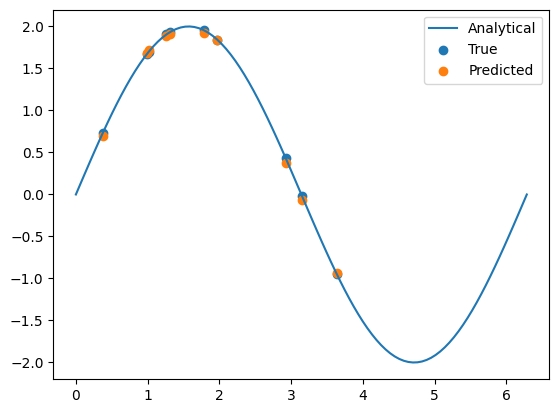

In [ ]:
#https://gist.github.com/madagra/64afe1b56ff5656b2b1acb19cc68f477
#https://towardsdatascience.com/introduction-to-functional-pytorch-b5bf739e1e6e
import numpy as np
import torch
from torch import nn
from torch import Tensor
from torch.func import functional_call
import torchopt
import matplotlib.pyplot as plt


class SimpleNN(nn.Module):
    def __init__(
        self,
        num_layers: int = 1,
        num_neurons: int = 5,
    ) -> None:
        """Basic neural network architecture with linear layers
        Args:
            num_layers (int, optional): number of hidden layers
            num_neurons (int, optional): neurons for each hidden layer
        """
        super().__init__()

        layers = []

        # input layer
        layers.append(nn.Linear(1, num_neurons))

        # hidden layers
        for _ in range(num_layers):
            layers.extend([nn.Linear(num_neurons, num_neurons), nn.Tanh()])

        # output layer
        layers.append(nn.Linear(num_neurons, 1))

        # build the network
        self.network = nn.Sequential(*layers)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.network(x.reshape(-1, 1)).squeeze()


def make_functional_fwd(model: torch.nn.Module):
    """Make a functional forward pass for a generic module
    This function is compatible with the torchopt library which
    returns the updated parameters as a tuple while the `functional_call`
    routine requires parameters dictionary. This conversion is automatically
    implemented by this function
    """

    keys = list(dict(model.named_parameters()).keys())

    def fn(data: Tensor, parameters: tuple[Tensor, ...]):
        params_dict = {k: v for k, v in zip(keys, parameters)}
        return functional_call(model, params_dict, (data,))

    return fn


def get_data(n_points: int = 20) -> tuple[Tensor, Tensor]:
    """Prepare the input data for training/test sets"""
    x = torch.rand(n_points) * 2.0 * torch.pi
    y = 2.0 * torch.sin(x + 2.0 * torch.pi)
    return x, y


if __name__ == "__main__":
    torch.manual_seed(42)

    model = SimpleNN(num_layers=2)
    model_func = make_functional_fwd(model)

    x_train, y_train = get_data(n_points=40)
    x_test, y_test = get_data(n_points=10)

    # choose optimizer with functional API using functorch
    num_epochs = 500
    lr = 0.01
    optimizer = torchopt.FuncOptimizer(torchopt.adam(lr=lr))
    loss_fn = torch.nn.MSELoss()

    # train the model
    loss_evolution = []
    params = tuple(model.parameters())

    for i in range(num_epochs):
        # update the parameters
        y = model_func(x_train, params)
        loss = loss_fn(y, y_train)
        params = optimizer.step(loss, params)

        if i % 100 == 0:
            print(f"Iteration {i} with loss {float(loss)}")
        loss_evolution.append(float(loss))

    # performance on the model on the test set
    y_pred = model_func(x_test, params)
    print(f"Loss on the test set: {loss_fn(y_pred, y_test)}")

    # plot the final predictions
    def fn_to_fit(x):
        return 2.0 * np.sin(x + 2.0 * np.pi)

    x_analyt = np.linspace(0, 2.0 * np.pi, 100)
    y_analyt = fn_to_fit(x_analyt)

    x_test_np = x_test.detach().numpy()
    y_test_np = y_test.detach().numpy()
    y_pred_np = y_pred.detach().numpy()

    plt.figure(1)
    plt.plot(x_analyt, y_analyt, label="Analytical")
    plt.scatter(x_test_np, y_test_np, label="True")
    plt.scatter(x_test_np, y_pred_np, label="Predicted")
    plt.legend()
    plt.show()

In [ ]:
#https://github.com/pytorch/tutorials/blob/main/prototype_source/vmap_recipe.py
import torch
# NB: vmap is only available on nightly builds of PyTorch.
# You can download one at pytorch.org if you're interested in testing it out.
from torch import vmap

####################################################################
# The first use case for vmap is making it easier to handle
# batch dimensions in your code. One can write a function `func`
# that runs on examples and then lift it to a function that can
# take batches of examples with `vmap(func)`. `func` however
# is subject to many restrictions:
#
# - it must be functional (one cannot mutate a Python data structure
#   inside of it), with the exception of in-place PyTorch operations.
# - batches of examples must be provided as Tensors. This means that
#   vmap doesn't handle variable-length sequences out of the box.
#
# One example of using `vmap` is to compute batched dot products. PyTorch
# doesn't provide a batched `torch.dot` API; instead of unsuccessfully
# rummaging through docs, use `vmap` to construct a new function:

torch.dot                            # [D], [D] -> []
batched_dot = torch.vmap(torch.dot)  # [N, D], [N, D] -> [N]
x, y = torch.randn(2, 5), torch.randn(2, 5)
z = batched_dot(x, y)

print(f"x: {x}")
print(f"y: {y}")
print(f"z: {z}")

####################################################################
# `vmap` can be helpful in hiding batch dimensions, leading to a simpler
# model authoring experience.
batch_size, feature_size = 3, 5
weights = torch.randn(feature_size, requires_grad=True)
print(f"weights: {weights}")

# Note that model doesn't work with a batch of feature vectors because
# torch.dot must take 1D tensors. It's pretty easy to rewrite this
# to use `torch.matmul` instead, but if we didn't want to do that or if
# the code is more complicated (e.g., does some advanced indexing
# shenanigins), we can simply call `vmap`. `vmap` batches over ALL
# inputs, unless otherwise specified (with the in_dims argument,
# please see the documentation for more details).
def model(feature_vec):
    # Very simple linear model with activation
    # v = feature_vec.dot(weights)
    # return torch.tensor([v,v+1])
    data = [[1, 2], [3, 4]]
    x_data = torch.tensor(data)
    return x_data


examples = torch.randn(batch_size, feature_size)
print(f"examples: {examples}")

result = torch.vmap(model)(examples)
print(f"result: {result}")

expected = torch.stack([model(example) for example in examples.unbind()])
print(f"expected: {expected}")

assert torch.allclose(result, expected)

x: tensor([[ 0.0327,  1.1478,  0.2456, -1.1227, -0.6412],
        [ 0.1334,  1.1113, -0.1386,  0.0078,  0.0959]])
y: tensor([[-0.5977,  0.2078,  1.6205, -0.8795, -0.1493],
        [-0.2656, -0.2342,  2.2183,  0.8813, -0.0677]])
z: tensor([ 1.7001, -0.6027])
weights: tensor([ 0.1164,  0.8006, -0.6367,  2.2237,  0.5500], requires_grad=True)
examples: tensor([[-0.2163, -0.0234, -0.4069,  0.1827, -1.9061],
        [-1.0411, -0.4820,  2.7922,  1.0468, -1.2729],
        [ 0.6814, -2.2780, -0.1667,  0.6843, -2.3623]])
result: tensor([[[1, 2],
         [3, 4]],

        [[1, 2],
         [3, 4]],

        [[1, 2],
         [3, 4]]])
expected: tensor([[[1, 2],
         [3, 4]],

        [[1, 2],
         [3, 4]],

        [[1, 2],
         [3, 4]]])


In [ ]:
#how to write a file in google colab

# First we need to mount the Google drive
import os
from google.colab import drive
drive.mount('/content/Hadrive')

import pandas as pd

data = {
  "calories": [420, 380, 390],
  "duration": [50, 40, 45]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

print(df)

!mkdir /content/Hadrive/MyDrive/Test1
df.to_csv("/content/Hadrive/MyDrive/Test1/dframe.csv")


df1 = pd.read_csv("/content/Hadrive/MyDrive/Test1/dframe.csv")
df1.head(10)

In [ ]:
sum = 0

for i in range(1,21,1):
    sum = sum + 1.1**i

sum

63.00249944258167